# EDA

https://www.kaggle.com/gspmoreira/news-portal-user-interactions-by-globocom#clicks_sample.csv

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pickle
import os
import glob

In [2]:
# Mount Google drive
from google.colab import drive
import os
import sys

drive.mount("/content/drive", force_remount=True)
app_folder = '/content/drive/MyDrive/AI Engineer/P9_My-Content/'


Mounted at /content/drive


# Articles metadata
Metadata information about all (364047) published articles.


In [3]:
articles_metadata = pd.read_csv(app_folder + 'archive/articles_metadata.csv')
print(articles_metadata.shape)
articles_metadata.head()

(364047, 5)


,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162


In [4]:
articles_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364047 entries, 0 to 364046
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   article_id     364047 non-null  int64
 1   category_id    364047 non-null  int64
 2   created_at_ts  364047 non-null  int64
 3   publisher_id   364047 non-null  int64
 4   words_count    364047 non-null  int64
dtypes: int64(5)
memory usage: 13.9 MB


There is no null values and all values are in int64 type.

## Article
**article_id**: The article id 


In [5]:
print(f"There is {articles_metadata['article_id'].nunique()} unique articles")

There is 364047 unique articles


## Category
**category_id**: The category id of the article.

In [6]:
print(f"There is {articles_metadata['category_id'].nunique()} unique categorie")

There is 461 unique categorie


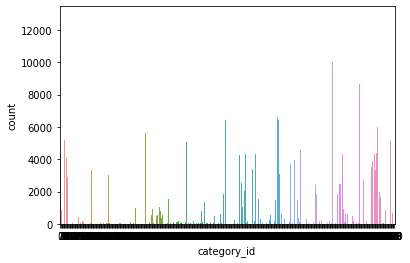

In [7]:
sns.countplot(x='category_id', data=articles_metadata)

## Creation date
**created_at_ts**: Timestamp of the article published date

In [8]:
articles_metadata['datetime'] = pd.to_datetime(articles_metadata['created_at_ts'] / 1000, unit='s')
print(f"Articles from {articles_metadata['datetime'].min()} to {articles_metadata['datetime'].max()}")

Articles from 2006-09-27 11:14:35 to 2018-03-13 12:12:30


## Publisher
**publisher_id**: Id of the publisher of the article

In [9]:
print(f"There is {articles_metadata['publisher_id'].nunique()} unique publisher_id")

There is 1 unique publisher_id


## Words Count
**words_count**: # of words in the article

In [10]:
articles_metadata['words_count'].describe()

count    364047.000000
mean        190.897727
std          59.502766
min           0.000000
25%         159.000000
50%         186.000000
75%         218.000000
max        6690.000000
Name: words_count, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


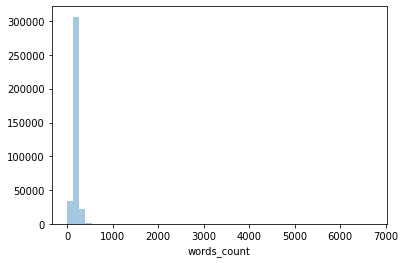

In [11]:
sns.distplot(articles_metadata['words_count'], kde=False)

# Clicks

In [12]:
path = app_folder + 'archive/clicks/clicks'
all_files = glob.glob(path + "/*.csv")

data = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    data.append(df)

clicks = pd.concat(data, axis=0, ignore_index=True)


In [13]:
clicks.shape

(2988181, 12)

In [14]:
clicks.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,2299,1506847007278053,1506847007000,2,108854,1506847051467,4,3,2,1,5,2
1,2299,1506847007278053,1506847007000,2,96663,1506847081467,4,3,2,1,5,2
2,2300,1506847027313054,1506847027000,4,108854,1506847864483,4,1,17,1,21,2
3,2300,1506847027313054,1506847027000,4,235840,1506847917607,4,1,17,1,21,2
4,2300,1506847027313054,1506847027000,4,145166,1506848048368,4,1,17,1,21,2


In [15]:
clicks.describe()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
count,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181
unique,322897,1048594,646874,72,46033,2983198,3,5,8,11,28,7
top,5890,1507563657895091,1507563657000,2,160974,1507320443928,4,1,17,1,25,2
freq,1232,124,127,1260372,37213,3,2904478,1823162,1738138,2852406,804985,1602601


In [16]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988181 entries, 0 to 2988180
Data columns (total 12 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   user_id              object
 1   session_id           object
 2   session_start        object
 3   session_size         object
 4   click_article_id     object
 5   click_timestamp      object
 6   click_environment    object
 7   click_deviceGroup    object
 8   click_os             object
 9   click_country        object
 10  click_region         object
 11  click_referrer_type  object
dtypes: object(12)
memory usage: 273.6+ MB


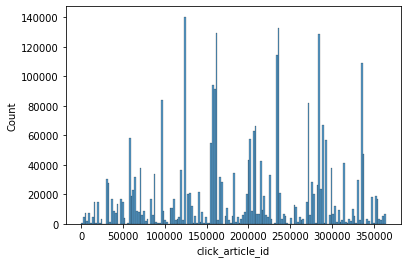

In [17]:
sns.histplot(clicks['click_article_id'], kde=False)

In [18]:
clicks['click_article_id'].nunique()

46033

In [19]:
clicks['click_article_id'].value_counts()[:5]

160974    37213
272143    28943
336221    23851
234698    23499
123909    23122
Name: click_article_id, dtype: int64

In [20]:
clicks['click_article_id'].value_counts()[-5:]

120347    1
120361    1
120365    1
120371    1
3         1
Name: click_article_id, dtype: int64

In [21]:
df.groupby(by=clicks['click_article_id']).sum()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
click_article_id,,,,,,,,,,,,
2137,249175,4524567643862555,4524567643000,14,345184,4524587711695,12,3,51,3,35,4
3330,543388,3016376174997189,3016376174000,13,410792,3016379064610,8,6,22,9,41,2
3889,221444,3016379271726302,3016379271000,6,256468,3016397958996,8,2,34,2,50,4
4243,778906,6032752395634441,6032752394000,24,955616,6032765472492,16,9,56,4,67,5
7947,3044812,25639189769781280,25639189764000,43,3610201,25639203436672,66,35,186,25,364,29
...,...,...,...,...,...,...,...,...,...,...,...,...
363127,268035,1508189156303810,1508189156000,5,283009,1508189385652,4,4,2,1,13,1
363291,3751725,48261995142281976,48261995131000,103,5653628,48262030150034,121,63,442,37,598,66
363380,320979,1508188256744227,1508188256000,2,206415,1508188342305,4,3,2,1,21,2


In [54]:
# Nombre de clicks sur un article pour un utilisateur
click_count_by_article = df.groupby(['user_id', 'click_article_id'], as_index=False).agg(
    click_count = pd.NamedAgg(column='click_article_id',aggfunc='count')
)
click_count_by_article['click_count'].value_counts()


1    6906
2       2
Name: click_count, dtype: int64

In [57]:
# Nombre de clicks d'un utilisateur
user_clicks = df.groupby(['user_id'], as_index=False).agg(
    user_clicks = pd.NamedAgg(column='click_article_id',aggfunc='count')
)
user_clicks['user_clicks'].value_counts()

2     1597
3      485
4      214
5       80
6       37
7       27
8       20
11      10
9        8
10       7
17       2
18       2
19       1
14       1
16       1
28       1
13       1
22       1
Name: user_clicks, dtype: int64

In [59]:
user_clicks['user_clicks']

0       2
1       2
2       3
3       3
4       2
       ..
2490    4
2491    2
2492    2
2493    2
2494    4
Name: user_clicks, Length: 2495, dtype: int64

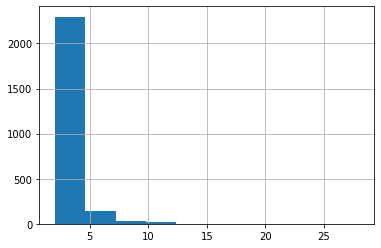

In [58]:
user_clicks['user_clicks'].hist()

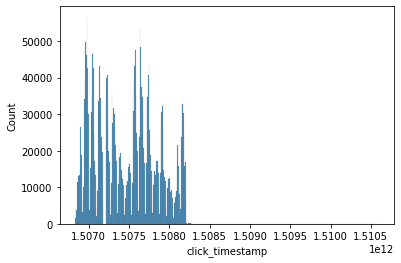

In [22]:
sns.histplot(clicks['click_timestamp'], kde=False)

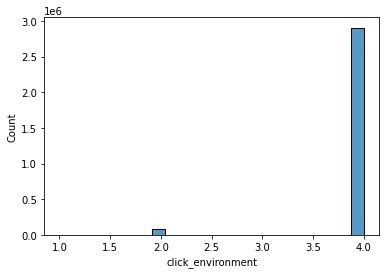

In [23]:
sns.histplot(clicks['click_environment'], kde=False)

In [24]:
clicks['click_environment'].nunique()

3

In [25]:
clicks['click_environment'].value_counts()

4    2904478
2      79743
1       3960
Name: click_environment, dtype: int64

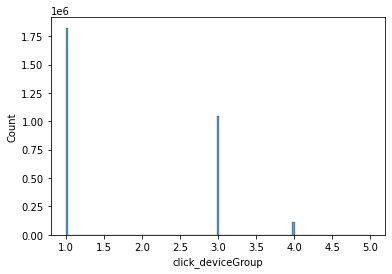

In [26]:
sns.histplot(clicks['click_deviceGroup'], kde=False)

In [27]:
clicks['click_deviceGroup'].nunique()

5

In [28]:
clicks['click_deviceGroup'].value_counts()

1    1823162
3    1047086
4     117640
5        283
2         10
Name: click_deviceGroup, dtype: int64

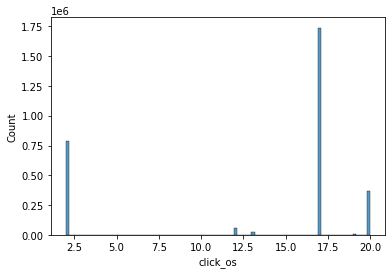

In [29]:
sns.histplot(clicks['click_os'], kde=False)

In [30]:
clicks['click_os'].nunique()

8

In [31]:
clicks['click_os'].value_counts()

17    1738138
2      788699
20     369586
12      60096
13      23711
19       6384
5        1513
3          54
Name: click_os, dtype: int64

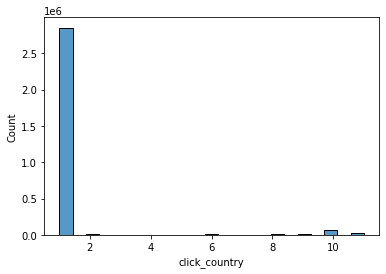

In [32]:
sns.histplot(clicks['click_country'], kde=False)

In [33]:
clicks['click_country'].nunique()

11

In [34]:
clicks['click_country'].value_counts()

1     2852406
10      61377
11      29999
8        9556
6        7256
9        6746
2        6101
3        4540
5        3498
4        3389
7        3313
Name: click_country, dtype: int64

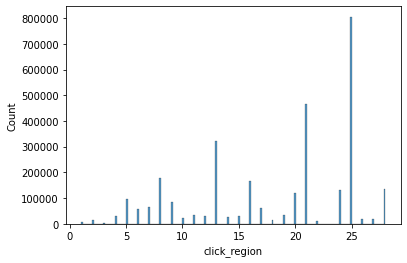

In [35]:
sns.histplot(clicks['click_region'], kde=False)

In [36]:
clicks['click_region'].nunique()

28

In [37]:
clicks['click_region'].value_counts()

25    804985
21    464230
13    320957
8     179339
16    164884
28    135793
24    130537
20    120884
5      96979
9      84693
7      64062
17     61514
6      57254
11     35934
19     34092
12     30875
4      30265
15     29535
14     25708
10     21995
26     18893
27     18711
2      16728
18     15083
22     13101
1       7110
3       3997
23        43
Name: click_region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


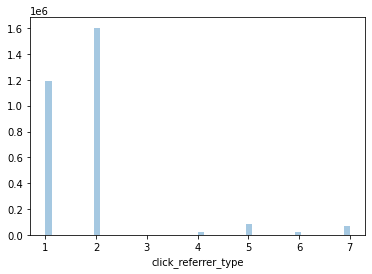

In [38]:
sns.distplot(clicks['click_referrer_type'], kde=False)

In [39]:
clicks['click_referrer_type'].nunique()

7

In [40]:
clicks['click_referrer_type'].value_counts()

2    1602601
1    1194321
5      80766
7      69798
6      20455
4      19820
3        420
Name: click_referrer_type, dtype: int64

# Articles
**articles_embeddings.pickle** Pickle (Python 3) of a NumPy matrix containing the Article Content Embeddings (250-dimensional vectors), trained upon articles' text and metadata by the CHAMELEON's ACR module (see paper for details) for 364047 published articles. 
P.s. The full text of news articles could not be provided due to license restrictions, but those embeddings can be used by Neural Networks to represent their content. See this paper for a t-SNE visualization of these embeddings, colored by category.

In [41]:
articles = pickle.load( open(app_folder + 'archive/articles_embeddings.pickle', "rb" ) )

In [42]:
print(f"{len(articles)} articles")

364047 articles


In [43]:
print(f"{len(articles[157541])} dimensional vectors")

250 dimensional vectors


In [44]:
print(f"{clicks['click_article_id'].nunique()} articles read out of a total of {len(articles)}")


46033 articles read out of a total of 364047
